<ipython-input-2-285e84e82aeb>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])


Mean Squared Error: 85.64478542986275
R^2 Score: 0.48108232960888264


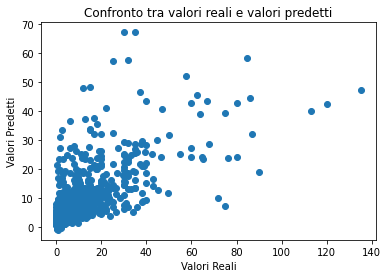

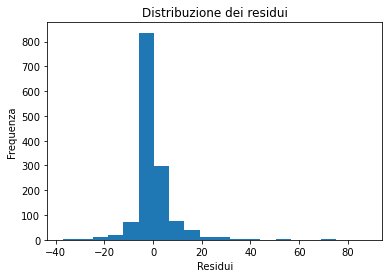

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Carica il dataset dal file CSV
data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/transfers3.csv")

# Seleziona le colonne che verranno utilizzate come features (variabili indipendenti)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X = data[features]

# Seleziona la variabile target (variabile dipendente)
y = data['fee_cleaned']

# Crea un dizionario per mantenere gli oggetti LabelEncoder
label_encoders = {}

# Effettua la codifica delle variabili categoriche
for column in X.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e addestra il modello GBM
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Effettua le previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot dei valori predetti rispetto ai valori reali
plt.scatter(y_test, y_pred)
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto tra valori reali e valori predetti')
plt.show()

# Plot dei residui
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei residui')
plt.show()

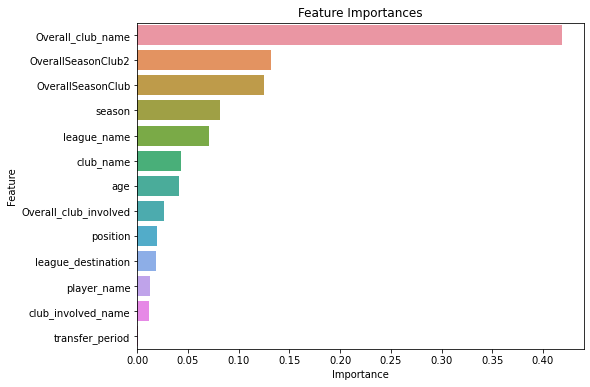

                  Feature  Importance
0       Overall_club_name    0.419181
12     OverallSeasonClub2    0.131979
11      OverallSeasonClub    0.124430
10                 season    0.081219
9             league_name    0.070855
4               club_name    0.043374
3                     age    0.040796
1   Overall_club_involved    0.026489
6                position    0.019253
2      league_destination    0.018041
5             player_name    0.012557
7      club_involved_name    0.011462
8         transfer_period    0.000363


In [2]:
# Get the feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the feature importances table
print(feature_importances)


In [3]:
# Crea una tabella con i dettagli dei dati di test, il valore reale e il valore predetto
results = X_test.copy()
results['Valore Reale'] = y_test
results['Valore Predetto'] = y_pred
results = results[['club_name', 'age', 'player_name', 'position', 'club_involved_name', 'season', 'Valore Reale', 'Valore Predetto']]

# Decodifica le variabili categoriche nella tabella dei risultati
categorical_columns = ['club_name', 'player_name', 'position', 'club_involved_name']

for column in categorical_columns:
    decoded_values = label_encoders[column].inverse_transform(results[column])
    results[column] = decoded_values

print(results)


                    club_name   age            player_name  \
6851            Spezia Calcio  21.0              Emil Holm   
6724               SSC Napoli  23.0    Leonardo Candellone   
245       Real Betis Balompié  34.0                Joaquín   
1880           Southampton FC  23.0            Oriol Romeu   
6799                  AS Roma  33.0           Rui Patrício   
...                       ...   ...                    ...   
2574  Wolverhampton Wanderers  20.0        Yerson Mosquera   
3128      Olympique Marseille  29.0           Luiz Gustavo   
2687        Tottenham Hotspur  19.0         Destiny Udogie   
5260            VfL Wolfsburg  18.0          Aster Vranckx   
1323       Ural Yekaterinburg  23.0  Ramazan Gadzhimuradov   

                position club_involved_name  season  Valore Reale  \
6851          Right-Back        SönderjyskE       9          0.30   
6724      Centre-Forward             Torino       8          0.50   
245         Right Winger         Fiorentina     

In [4]:
results.to_csv('GBM.csv', index=False)


<ipython-input-5-28fec0d2b499>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])


Mean Squared Error: 60.82468072633056
R^2 Score: 0.4409141135359518


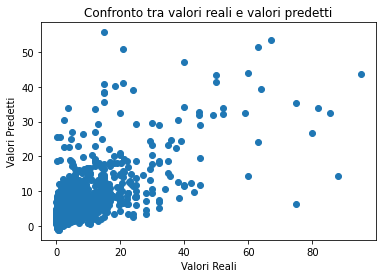

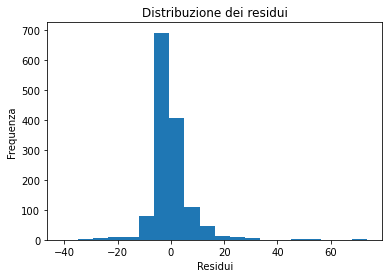

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Carica il dataset dal file CSV
data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/transfers3.csv")

# Seleziona le colonne che verranno utilizzate come features (variabili indipendenti)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X = data[features]

# Seleziona la variabile target (variabile dipendente)
y = data['fee_cleaned']

# Crea un dizionario per mantenere gli oggetti LabelEncoder
label_encoders = {}

# Effettua la codifica delle variabili categoriche
for column in X.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Crea e addestra il modello GBM
model = GradientBoostingRegressor(random_state=20)
model.fit(X_train, y_train)

# Effettua le previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot dei valori predetti rispetto ai valori reali
plt.scatter(y_test, y_pred)
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto tra valori reali e valori predetti')
plt.show()

# Plot dei residui
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei residui')
plt.show()


<ipython-input-6-69a31522c68a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoders[column].fit_transform(X[column])


Mean Squared Error: 73.69315459783887
R^2 Score: 0.4102690501599987


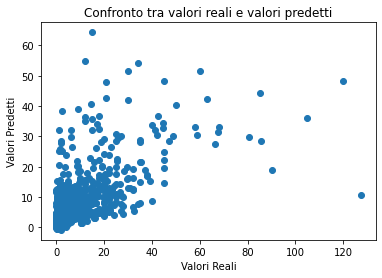

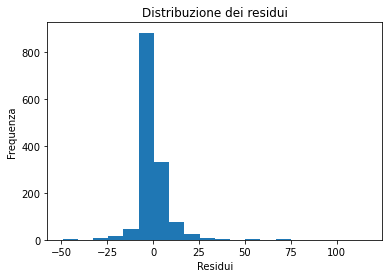

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Carica il dataset dal file CSV
data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/transfers3.csv")

# Seleziona le colonne che verranno utilizzate come features (variabili indipendenti)
features = ['Overall_club_name', 'Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X = data[features]

# Seleziona la variabile target (variabile dipendente)
y = data['fee_cleaned']

# Crea un dizionario per mantenere gli oggetti LabelEncoder
label_encoders = {}

# Effettua la codifica delle variabili categoriche
for column in X.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])


# Suddividi il dataset in set di addestramento e set di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Crea e addestra il modello GBM
model = GradientBoostingRegressor(random_state=60)
model.fit(X_train, y_train)

# Effettua le previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot dei valori predetti rispetto ai valori reali
plt.scatter(y_test, y_pred)
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto tra valori reali e valori predetti')
plt.show()

# Plot dei residui
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei residui')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, r2_score

# Carica il dataset dal tuo CSV
df = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/transfers3.csv")

# Seleziona le feature che desideri utilizzare per la regressione
numeric_features = ['age', 'OverallSeasonClub', 'OverallSeasonClub2', 'Overall_club_name', 'Overall_club_involved']
categorical_features = ['club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'league_destination']

# Seleziona la variabile target
target = 'fee_cleaned'

# Dividi il dataset in caratteristiche e variabile target
X_numeric = df[numeric_features]
X_categorical = df[categorical_features]
y = df[target]

# Codifica le caratteristiche categoriche
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X_categorical))
X_encoded.columns = encoder.get_feature_names(categorical_features)

# Concatena le caratteristiche numeriche con quelle codificate
X = pd.concat([X_numeric, X_encoded], axis=1)

# Dividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crea il modello XGBoost con i parametri ottimali precedentemente rilevati
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8,
                             colsample_bytree=1.0, reg_alpha=0, reg_lambda=0.1)

# Addestra il modello
xgb_model.fit(X_train, y_train)

# Fai le previsioni sul set di test utilizzando il modello addestrato
y_pred = xgb_model.predict(X_test)

import numpy as np

# Applica una trasformazione logaritmica ai valori target
y_test = np.abs(y_test)
y_pred = np.abs(y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Log Error:", msle)
print("Explained Variance Score:", evs)
print("R-squared:", r2)


C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Mean Squared Error: 93.06552987114998
Mean Absolute Error: 4.378588594862417
Mean Squared Log Error: 0.488139217936236
Explained Variance Score: 0.42715327870511666
R-squared: 0.42474331712820335


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, r2_score

# Carica il dataset dal tuo CSV
df = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/transfers3.csv")

# Seleziona le feature che desideri utilizzare per la regressione
numeric_features = ['age', 'OverallSeasonClub', 'OverallSeasonClub2', 'Overall_club_name', 'Overall_club_involved']
categorical_features = ['club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'league_destination']

# Seleziona la variabile target
target = 'fee_cleaned'

# Dividi il dataset in caratteristiche e variabile target
X_numeric = df[numeric_features]
X_categorical = df[categorical_features]
y = df[target]

# Codifica le caratteristiche categoriche
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(X_categorical))
X_encoded.columns = encoder.get_feature_names(categorical_features)

# Concatena le caratteristiche numeriche con quelle codificate
X = pd.concat([X_numeric, X_encoded], axis=1)

# Dividi i dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea il modello XGBoost con i parametri ottimali precedentemente rilevati
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8,
                             colsample_bytree=1.0, reg_alpha=0, reg_lambda=0.1)

# Addestra il modello
xgb_model.fit(X_train, y_train)

# Fai le previsioni sul set di test utilizzando il modello addestrato
y_pred = xgb_model.predict(X_test)

import numpy as np

# Applica una trasformazione logaritmica ai valori target
y_test = np.abs(y_test)
y_pred = np.abs(y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Log Error:", msle)
print("Explained Variance Score:", evs)
print("R-squared:", r2)

label_encoders = {}  # Dizionario per memorizzare gli oggetti LabelEncoder

# Codifica le colonne categoriche e memorizza gli oggetti LabelEncoder
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Crea una tabella con i dettagli dei dati di test, il valore reale e il valore predetto
results = X_test.copy()
results['Valore Reale'] = y_test
results['Valore Predetto'] = y_pred
results = results.join(df[categorical_features])

# Decodifica le variabili categoriche nella tabella dei risultati
for column in categorical_features:
    le = label_encoders[column]
    decoded_values = le.inverse_transform(results[column])
    results[column] = decoded_values

print(results)

    
    # Lista delle colonne da mantenere
keep_columns = ['fee_cleaned','age', 'Valore Reale', 'Valore Predetto', 'club_name', 'player_name', 'position', 'club_involved_name', 'season']

# Elimina le colonne indesiderate
results = results.drop(columns=[col for col in results.columns if col not in keep_columns])

# Stampa il DataFrame risultante
print(results)


C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Mean Squared Error: 86.65548054880618
Mean Absolute Error: 4.687042937161152
Mean Squared Log Error: 0.5478210571218629
Explained Variance Score: 0.47725904803131247
R-squared: 0.4749585760847722
       age  OverallSeasonClub  OverallSeasonClub2  Overall_club_name  \
6851  21.0           0.000000            0.000000           0.000000   
6724  23.0           0.000000            0.066655           0.000000   
245   34.0           0.000000            0.167724           0.000000   
1880  23.0           0.156278            0.329203           0.202573   
6799  33.0           0.149958            0.000000           0.529243   
...    ...                ...                 ...                ...   
2574  20.0           0.000000            0.000000           0.000000   
3128  29.0           0.000000            0.136229           0.000000   
2687  19.0           0.633258            0.000000           0.569440   
5260  18.0           0.195568            0.000000           0.410259   
1323  23.0  

In [ ]:
# Get the feature importances from the trained model
importances = xgb_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the top 10 feature importances
print(feature_importances.head(10))


In [10]:
results.to_csv('XGB0.csv', index=False)
